# DBSCAN with SKLearn #

Density-based Spatial Clustering of Applications with Noise, aka DBSCAN, is a distance based clustering algorithm that automatically determines the number of clusters to use. You've probably heard of "heat-seeking missles", well DBSCAN is a density-seeking missile".

DBSCAN starts with a random sample from the dataset and groups it with neighboring points. It determines the neighbors by creating a circle around the point whose radius is equal to the `epsilon` parameter. Within this circle, as long as there are a sufficient number of neighbors, the algorithm moves on to each of the sample's neighbors and repeats its search. In this way, it travels around the features, moving in whichever direction the clumps spread. The algorithm must be told what a "sufficient number" of neighbrs is, through the `min_samples` parameter.

![dbscan.png](/Users/ali/Downloads/dbscan.png)

### References: ###
Here are four articles and a Github repository that may help you understand DBSCAN better. One of the articles contains source code for the algorithm and the others show how to use it with sklearn. The last link is to Erik Lindernoren's *ML-From-Scratch* github repository. I don't mind if you explore Erik's code to learn from, but of course you must use his algorithms ethically.
* [How DBSCAN Works and Why We Should Use it by Kevin Salton do Prado](https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80)
* [DBSCAN Clustering Explained by Soner Yildirim's](https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556)
* [Explaning DBSCAN Clustering by Kamil Mysiak](https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31)
* [DBSCAN - Overview, Example, & Evaluation by Tara Mullin](https://medium.com/@tarammullin/dbscan-2788cfce9389)
* [Erik Lindernoren's DBSCAN implementation on ML-From-Scratch](https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/unsupervised_learning/dbscan.py)
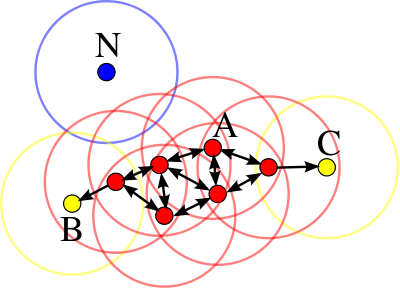

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

## Generating Data ##

Use sklearn to create two interesting data distributions that will demonstrate a shortcoming of the KMeans algorithm but that can be modeled correctly with DBSCAN. Of course it would be better if this were real data, but it's easier to demonstrate with generated data

[]

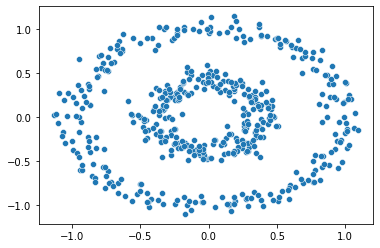

In [2]:
# Use sklearn to create an interesting dataset
(circle_samples, circle_labels) = make_circles(factor=0.4, noise=0.07, n_samples=500)

# Show the data
sns.scatterplot(x=circle_samples[:,0], y=circle_samples[:,1])
plt.plot()

[]

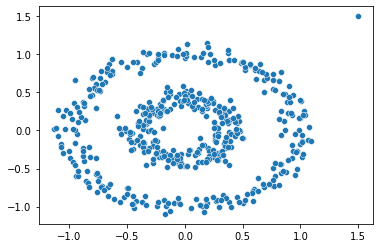

In [3]:
# Add an obvious outlier
circle_samples = np.append(circle_samples, [[1.5, 1.5]], axis=0)
circle_labels = np.append(circle_labels, [-1], axis=0)

# Show the data
sns.scatterplot(x=circle_samples[:,0], y=circle_samples[:,1])
plt.plot()

## Clustering Datasets with KMeans ##

Remember, KMeans is based on each sample's distance from a centroid. Therefore, it generates clusters that are mostly circular in nature. This can be the downfall of KMeans for strangely shaped clusters.

[]

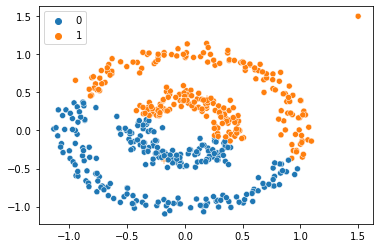

In [4]:
model = KMeans(n_clusters=2)
predict = model.fit_predict(circle_samples)
centroids = model.cluster_centers_
sns.scatterplot(x=circle_samples[:,0], y=circle_samples[:,1], hue=predict)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker="+")
plt.plot()

## Clustering Datasets with DBSCAN  ##

In contrast to KMEANS, the DBSCAN algorithm is "density-seeking." It travels from one sample to the next as long as the samples are sufficiently close together. It will cluster the same samples correctly.

`eps` is the maximum distance between two points to still considered neighbors (e.g., circle radius).
`min_samples` the minimum number of neighbors needed to be a core cluster.

Note that the original DBSCAN algorithm will detect outliers. With KMeans, we had to add some extra code.

[]

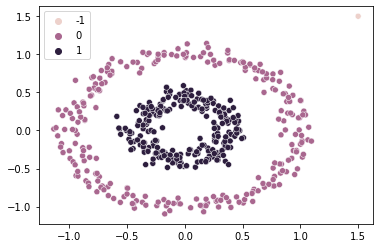

In [5]:
# eps is the maximum distance between two points to still considered neighbors (e.g., circle radius).
# min_samples the minimum number of neighbors needed to be a core cluster.
model = DBSCAN(eps=0.2, min_samples=9)
predict = model.fit_predict(circle_samples)
sns.scatterplot(x=circle_samples[:,0], y=circle_samples[:,1], hue=predict)
plt.plot()

### Exercise ###

Use KMeans and DBSCAN to cluster data created with the `sklearn.datasets.make_moons` function. Unlike `make_circles`, the `make_moons` function does not have a `factor` parameter. As a reminder, here is how you create two plots side-by-side:

```
colors = ("royalblue", "orangered", "forestgreen")
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(x=moon_samples[:,0], y=moon_samples[:,1], c=[colors[clus_id] for clus_id in km_predict])
ax[0].scatter(x=centroids[:,0], y=centroids[:,1], marker="+", c='black')
ax[1].scatter(x=moon_samples[:,0], y=moon_sapmles[:,1], c=dbscan_predict)
plt.show()
```

In [6]:
from sklearn.datasets import make_moons

In [7]:
(moon_samples, moon_labels) = make_moons(noise=0.08)

In [8]:
db_model = DBSCAN(eps=.3, min_samples=5)
dbscan_predict = db_model.fit_predict(moon_samples)

In [9]:
km_model = KMeans(n_clusters=2, max_iter=15)
km_predict = km_model.fit_predict(moon_samples)
centroids = km_model.cluster_centers_

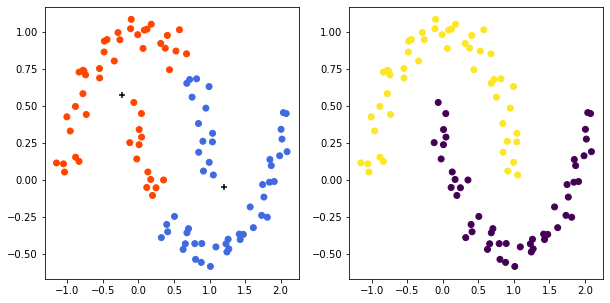

In [10]:
colors = ("royalblue", "orangered", "forestgreen")
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].scatter(x=moon_samples[:,0], y=moon_samples[:,1], c=[colors[clus_id] for clus_id in km_predict])#KM

ax[0].scatter(x=centroids[:,0], y=centroids[:,1], marker="+", c='black') #centroids

ax[1].scatter(x=moon_samples[:,0], y=moon_samples[:,1], c=dbscan_predict)#DB

plt.show()

## Tuning DBSCAN Parameters ##

The DBSCAN algorithm will return vastly different clusters depending on the values of `epsilon` and `min_samples`. The values that you choose depend on knowing something about the data domain: what does the input data represent and what values should make good clusters? But ultimately it's going to come down to some trial and error and knowing what a good answer is for the problem at hand.

### Minimum Samples ###

Here are some rules of thumb for calculating `min_samples`:
* `min_samples` should usually be greater than the number of dimensions in the dataset. Try starting at twice the number of dimensions (e.g, $2 \cdot d$ where $d$ is the number of dimensions), and then adjust as needed
* In general, larger datasets should have higher minimum samples
* Higher minimum samples should lead to more noise

Three examples are shown below: one with $6 \cdot d$ (12 samples), another with $4 \cdot d$ (8 samples), and the last with $2 \cdot d$ (4 samples). You'll notice that the 4 sample model appears to capture the patterns better.

[]

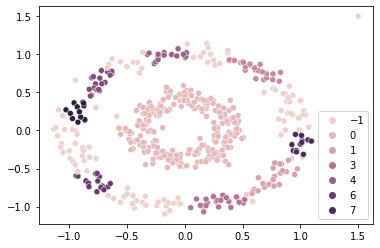

In [11]:
model = DBSCAN(eps=0.15, min_samples=12)
predict = model.fit_predict(circle_samples)
sns.scatterplot(x=circle_samples[:,0], y=circle_samples[:,1], hue=predict)
plt.plot()

[]

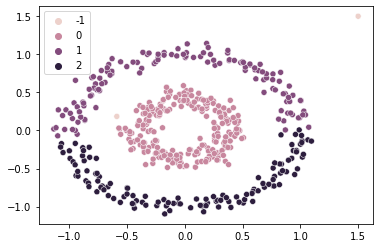

In [12]:
model = DBSCAN(eps=0.15, min_samples=8)
predict = model.fit_predict(circle_samples)
sns.scatterplot(x=circle_samples[:,0], y=circle_samples[:,1], hue=predict)
plt.plot()

[]

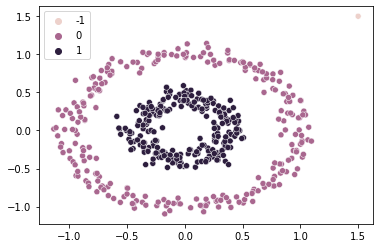

In [13]:
model = DBSCAN(eps=0.16, min_samples=4)
predict = model.fit_predict(circle_samples)
sns.scatterplot(x=circle_samples[:,0], y=circle_samples[:,1], hue=predict)
plt.plot()

### Epsilon Values ###

With regard to epsilon, some have proposed the following method ([Ester, at al 1996](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)):
* Take whatever value you used for `min_samples` as `k` and calculate the average distance from each sample to its nearest `k` neighbors
* Sort the k-distances so that the tightest grouping of points is on one side of the graph (those having smallest k-distance) and the cluster with lowest density is on the other side (those having largest k-distance).
* The graph should look like an exponential growth/decay with a sharp curve somewhere on the picture (the sharp curve is sometimes called the elbow). The k-distance that corresponds to the elbow is the best value for epsilon.

The reason this approach works is because the value for epsilon represents the distance between a sample its neighbors. By selecting the elbow, we are balancing an epsilon large enough to contain most neighbors yet not so large that outlier samples would look like anything but noise.

In [14]:
from sklearn.neighbors import NearestNeighbors

fig = plt.figure(figsize=(7,7))
knn = NearestNeighbors(n_neighbors=4)
fit = knn.fit(circle_samples)
distances, _ = fit.kneighbors(circle_samples)
mean_knn = np.mean(distances, axis=1)
mean_knn = np.sort(mean_knn, axis=0)

%matplotlib notebook
plt.plot(mean_knn)
plt.show()

<IPython.core.display.Javascript object>

[]

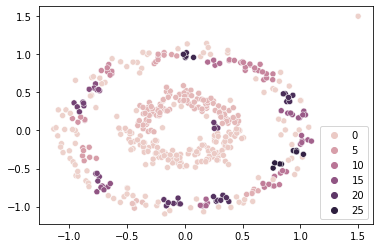

In [15]:
%matplotlib inline

optimal_epsilon = 0.07
optimal_samples = 4

model = DBSCAN(eps=optimal_epsilon, min_samples=optimal_samples)
predict = model.fit_predict(circle_samples)
sns.scatterplot(x=circle_samples[:,0], y=circle_samples[:,1], hue=predict)
plt.plot()

## Exercise ##

Use `sklearn.datasets` to create a random dataset that you can cluster with the `KMeans` and `DBSCAN` algorithms.
```
from sklearn.datasets import make_blobs, make_classification
X1, y1 = make_blobs(n_samples=500, n_features=2, cluster_std=0.6, centers=12)
X2, y2 = make_classification(n_features=2, n_redundant=0, n_samples=500, n_classes=3, n_clusters_per_class=1)
plt.scatter(x=samples[:,0], y=samples[:,1], c=labels, cmap='tab20') # 'tab20' is a good color map
```

Your assignment is to use the parameter tuning tricks to determine the optimal values for the model. Show the results by creating a 2x3 plot that shows a KMeans plot, the ground truth, and the DBSCAN plot.
 1. First, for `KMeans`, use the WSS Elbow Method to choose `k`
 2. Next, for `DBSCAN`, use the rules of thumb to choose `min_samples` (e.g., think about it and make a decision) and then the KNN Elbow Method to calculate `epsilon`
After you have chosen the best parameters, run the clustering algorithm and plot the results. Did your choices lead to accurate clusters? Did one algorithm perform better than the other?

![parameter_tuning-2.png](/Users/ali/Downloads/download.png)

***You can submit a python file (*.py) or a jupyter notebook. A notebook is probably easier for this assignment.***
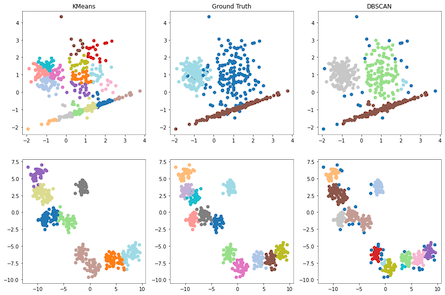

In [16]:
from sklearn.datasets import make_blobs, make_classification

(blobs, blobLables) = make_blobs(n_samples=500, n_features=2, cluster_std=0.6, centers=12)
(lines, lineLabels) = make_classification(n_features=2, n_redundant=0, n_samples=500, n_classes=3, n_clusters_per_class=1)

In [17]:
def kElbow(X, cluster_count):
    # CALCULATE WSSE FOR A RANGE OF POSSIBLE K-VALUES
    i = 1
    wsses = []
    for i in range(i, cluster_count + 1, 1):
        km = KMeans(n_clusters=i, max_iter=10)
        km.fit(X)
        wsse = km.inertia_
        wsses.append(wsse)

    i=2
    for i in range(i, len(wsses)-1, 1):
        a1 = wsses[i - 1] - wsses[i]
        b1 = wsses[i] - wsses[i + 1]
        if (a1) > 2*(b1):
            cluster_count = i
            break
    return cluster_count

In [18]:
#KMEANS
kBlobs = kElbow(blobs, 12)
kmBlobs = KMeans(n_clusters= kBlobs, max_iter=25)
kmBlobs.fit(blobs)
blobClusters = kmBlobs.predict(blobs)
blobCentroids = kmBlobs.cluster_centers_

kLines = kElbow(lines, 3)
kmLines = KMeans(n_clusters=kLines, max_iter=25)
kmLines.fit(lines)

lineCentroids = kmLines.cluster_centers_
lineClusters = kmLines.predict(lines)

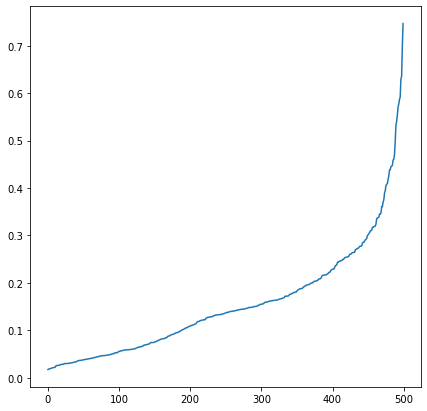

In [19]:
#DBScan
fig = plt.figure(figsize=(7,7))
knn = NearestNeighbors(n_neighbors=8)
fit = knn.fit(lines)
distances, _ = fit.kneighbors(lines)
mean_knn = np.mean(distances, axis=1)
mean_knn = np.sort(mean_knn, axis=0)

plt.plot(mean_knn)
plt.show()

modelBlobs = DBSCAN(eps=.888, min_samples=8)
predictBlobs = modelBlobs.fit_predict(blobs)

modelLines = DBSCAN(eps=.269, min_samples=7)
predictLines = modelLines.fit_predict(lines)


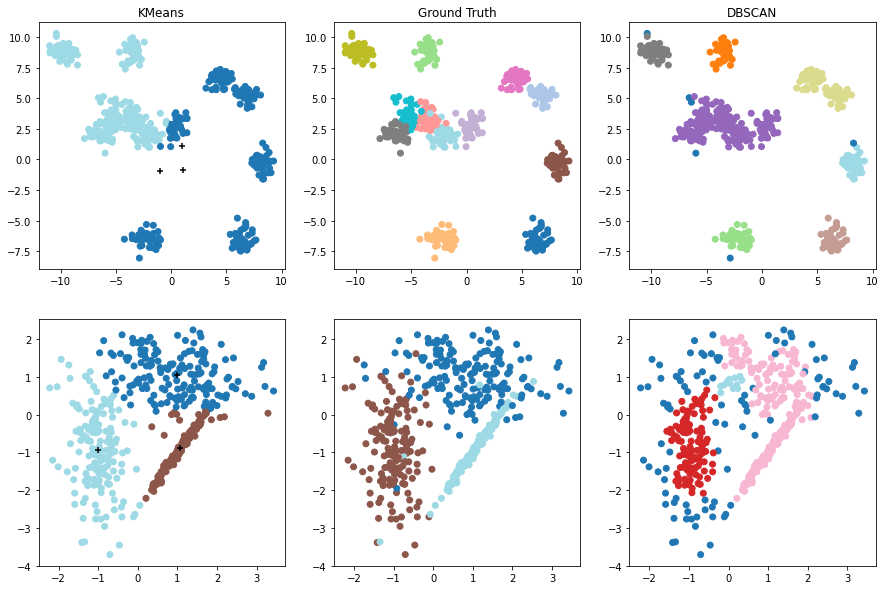

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
ax[0][0].set_title('KMeans')
ax[0][1].set_title('Ground Truth')
ax[0][2].set_title('DBSCAN')

ax[0][0].scatter(x=blobs[:,0], y=blobs[:,1], c=blobClusters, cmap='tab20')
ax[0][0].scatter(x=lineCentroids[:,0], y=lineCentroids[:,1], marker="+", c='black')

ax[0][1].scatter(x=blobs[:,0], y=blobs[:,1], c=blobLables, cmap='tab20')

ax[0][2].scatter(x=blobs[:,0], y=blobs[:,1], c=predictBlobs, cmap='tab20')

ax[1][0].scatter(x=lines[:,0], y=lines[:,1], c=lineClusters, cmap='tab20')
ax[1][0].scatter(x=lineCentroids[:,0], y=lineCentroids[:,1], marker="+", c='black')

ax[1][1].scatter(x=lines[:,0], y=lines[:,1], c=lineLabels, cmap='tab20')

ax[1][2].scatter(x=lines[:,0], y=lines[:,1], c=predictLines, cmap='tab20')

plt.show()